In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sbn
import plotly.graph_objects as go
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

from Constants import *

In [2]:
seed = 8
np.random.seed(seed)

In [3]:
dataset = pd.read_csv(DATASET_FILE)
dataset.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [4]:
data = dataset.copy()

In [5]:
data.shape

(1025, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,204,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Handling null values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

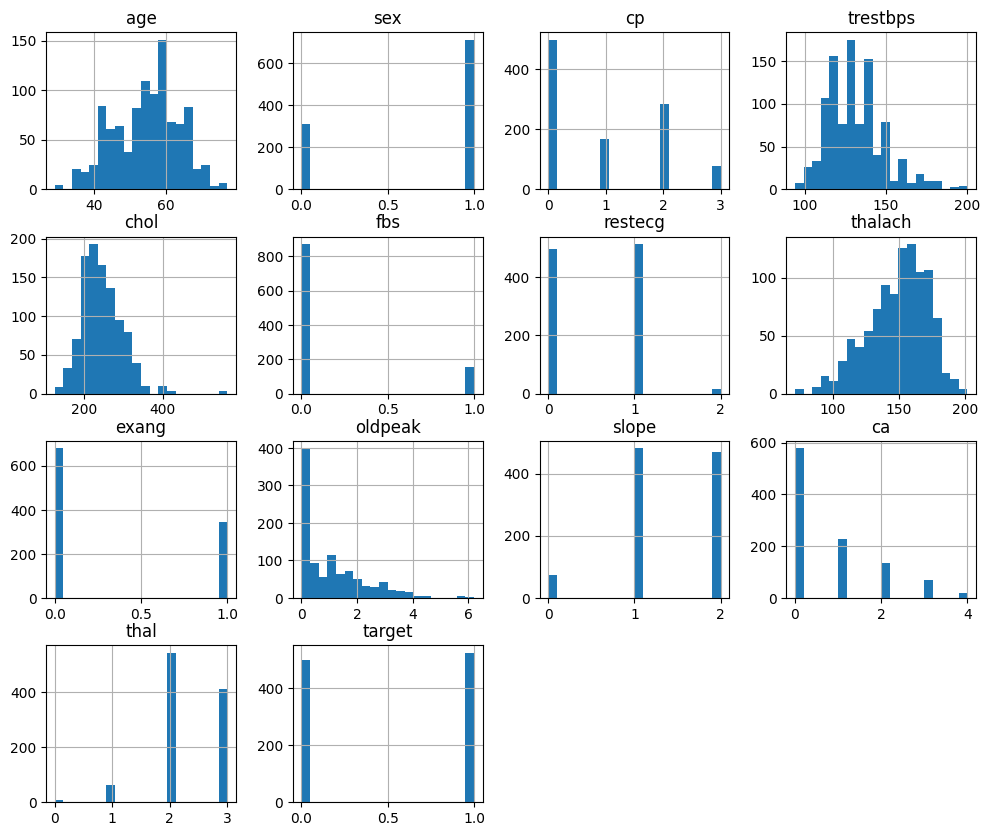

In [10]:
hist = data.hist(bins = 20, figsize = (12, 10))

In [11]:
print(data["sex"].unique())
print(data["cp"].unique())
print(data["fbs"].unique())
print(data["restecg"].unique())
print(data["exang"].unique())
print(data["slope"].unique())
print(data["thal"].unique())
print(data["target"].unique())

[1 0]
[0 1 2 3]
[0 1]
[1 0 2]
[0 1]
[2 0 1]
[3 2 1 0]
[0 1]


Categorical features in the data have some columns in the data containing unsupported values;

- cp: chest pain type, has four possible outcomes.
- sex: male or female.
- fbs: fasting blood sugar, 1 if greater than 120 mg/dl, 0 if false.
- restecg: resting electrocardiographic results, three possible values.
- exang: exercise induced angina, 1 for yes 0 for no.
- slope: the slope of the peak excercise ST segment, three possible outcomes
- thal: three possible outcomes, 1 normal, 2 fixed defect and 0 reversible defect.
- target: 1 has disease, 0 doesn't.

In [12]:
lab_enc = LabelEncoder()
data['sex'] = lab_enc.fit_transform(data['sex'])
data['cp'] = lab_enc.fit_transform(data['cp'])
data['fbs'] = lab_enc.fit_transform(data['fbs'])
data['restecg'] = lab_enc.fit_transform(data['restecg'])
data['exang'] = lab_enc.fit_transform(data['exang'])
data['slope'] = lab_enc.fit_transform(data['slope'])
data['thal'] = lab_enc.fit_transform(data['thal'])

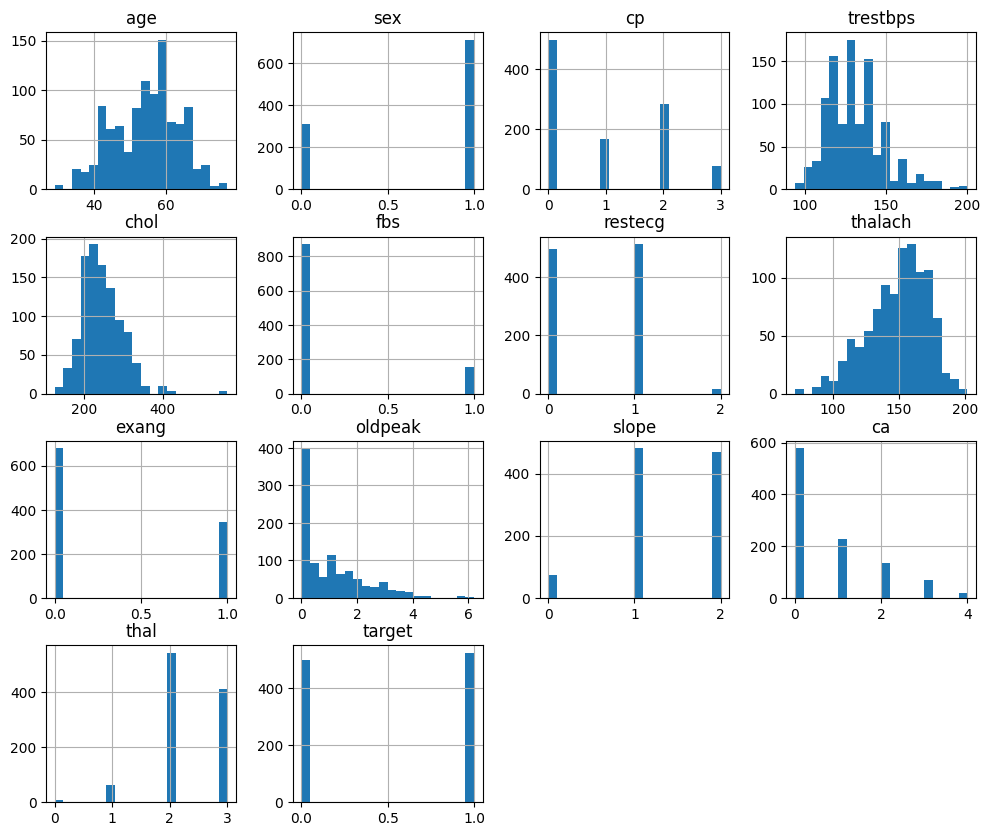

In [13]:
# Histogram of features

hist = data.hist(bins = 20, figsize = (12, 10))

Highest age:  77 Lowest age:  29


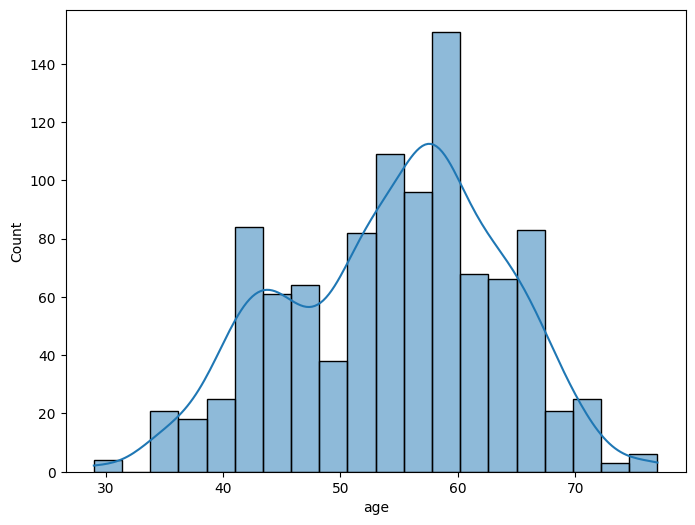

In [14]:
# Age distribution

plt.figure(figsize = (8, 6))
sbn.histplot(data['age'], kde = True, bins = 20)
print("Highest age: ", data['age'].max(), "Lowest age: ", data['age'].min())

In [15]:
cp_ranges = {
    'Type 0': ['Type 0', 0],
    'Type 1': ['Type 1', 1],
    'Type 2': ['Type 2', 2],
    'Type 3': ['Type 3', 3]
}

chest_pain = data.groupby(pd.cut(data['cp'], 
                                bins = [-float('inf')]+[i[1] for i in cp_ranges.values()], 
                                labels = cp_ranges.keys())).size().to_dict()

colors = {'Type 0': '#afafaf',
          'Type 1': '#666666',
          'Type 2': '#333333',
          'Type 3': '#000000'}

fig = go.Figure(data=[go.Pie(labels=list(chest_pain.keys()), values=list(chest_pain.values()),
                             marker=dict(colors=list(colors.values())))])
fig.update_layout(title='Chest Pain', showlegend = True)
fig.show()

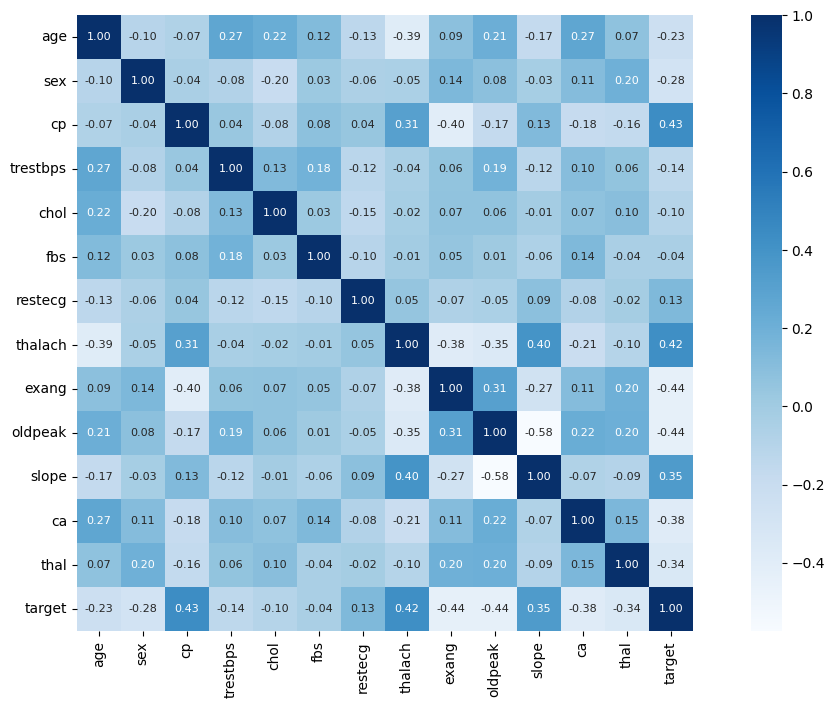

In [16]:
# Feature Correlation

corrmat = data.corr()

plt.figure(figsize=(15, 8))

hm = sbn.heatmap(corrmat,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 8}, 
                 yticklabels = data.columns, 
                 xticklabels = data.columns, 
                 cmap = "Blues"                 
                 )

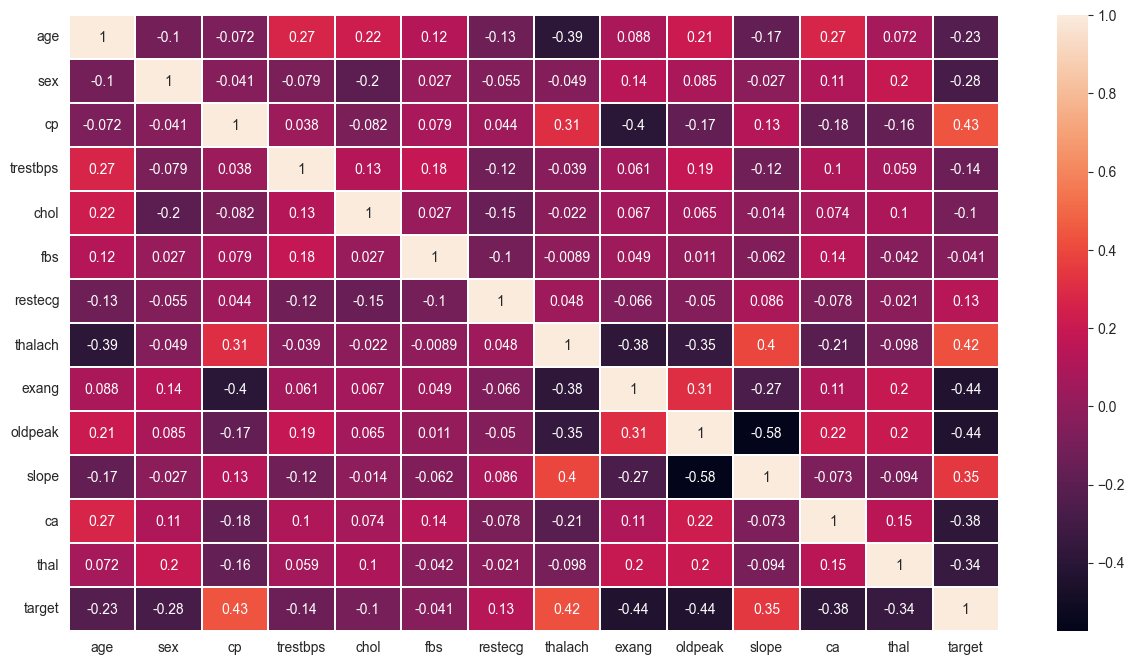

In [17]:
sbn.set_style('whitegrid')
plt.figure(figsize = (15, 8))
sbn.heatmap(data.corr(), annot = True, linewidths = .3)
plt.show()

Text(0.5, 1.0, 'Target Counts')

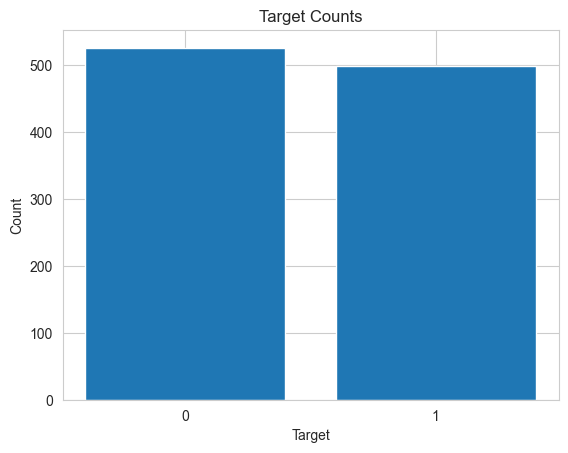

In [18]:
plt.bar(data['target'].unique(), data['target'].value_counts())
plt.xticks([0, 1])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Counts")

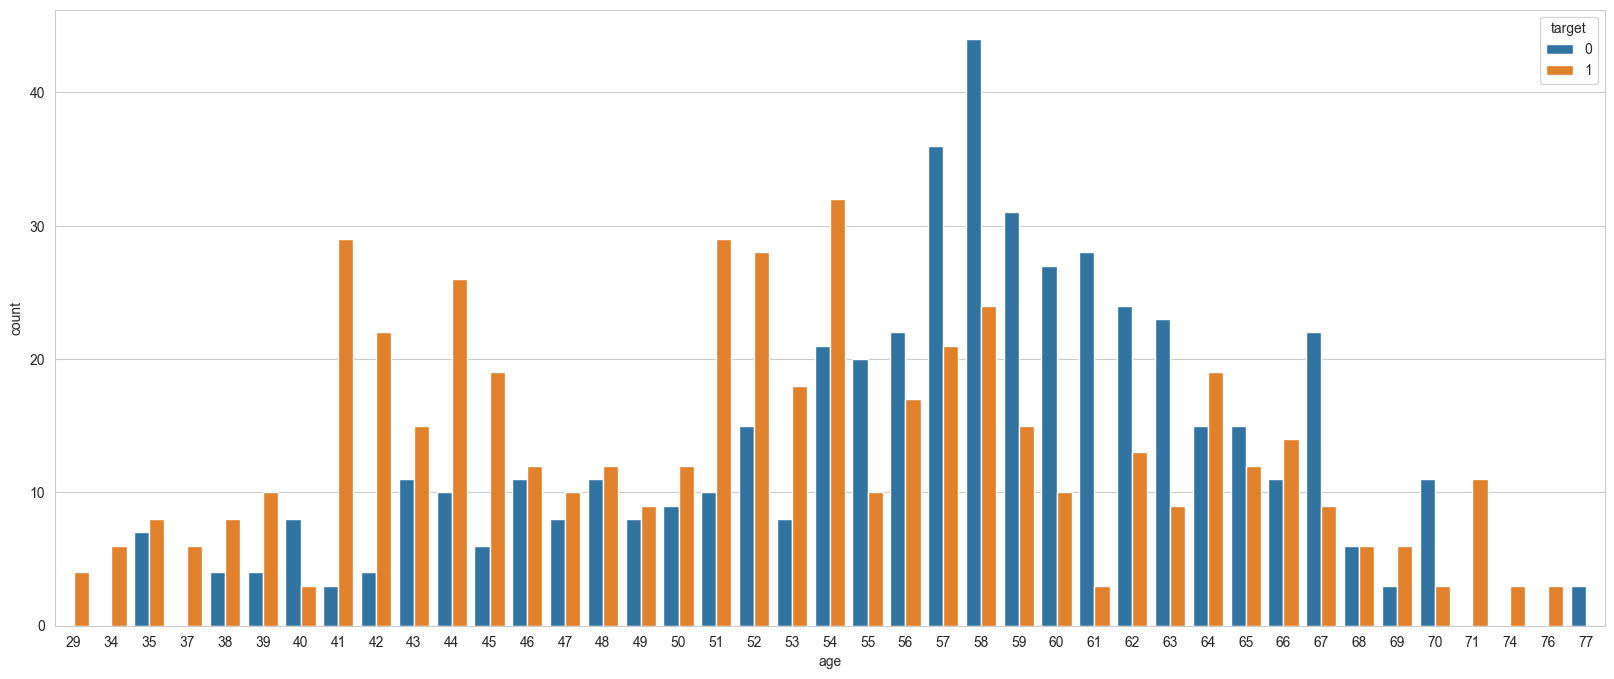

In [19]:
plt.figure(figsize = (20, 8))
sbn.countplot(x = 'age', data = data, hue = 'target')
plt.show()

In [20]:
# Feature and Target selection

X = data.drop('target', axis = 1)
Y = data['target']
print(X.shape)
print(Y.shape)

(1025, 13)
(1025,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 69)#, shuffle = True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

print(X_train.shape, y_train.shape)

(768, 13) (768,)


In [22]:
y_train = y_train.copy()
y_test = y_test.copy()

y_train[y_train > 0] = 1
y_test[y_test > 0] = 1

In [23]:
# Define the XGBClassifier xgb_class
xgb_class = XGBClassifier() # max_depth = 7, n_estimators = 100)

# Fit the xgb_class to the training data
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
y_pred = xgb_class.predict(X_test)

In [25]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("XGBClassifier accuracy: %.2f%% \n " % (accuracy * 100))

# Compute the feature importance
feature_importances = xgb_class.feature_importances_ * 100
print("Feature importances:")
print(feature_importances)

XGBClassifier accuracy: 98.44% 
 
Feature importances:
[ 5.2817307  7.605259  23.854836   3.8964045  3.3294837  2.9348958
  2.5810483  2.8974316  6.367062   6.6964426  6.8100915 15.4965315
 12.24879  ]


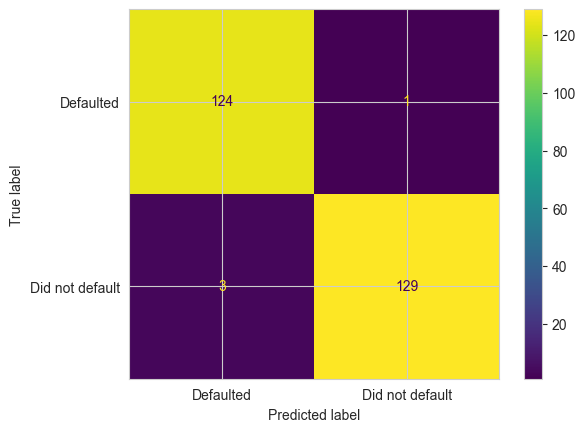

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Defaulted", "Did not default"])

conf_mat.plot()
plt.show()

Text(0.5, 1.0, 'Feature Importance')

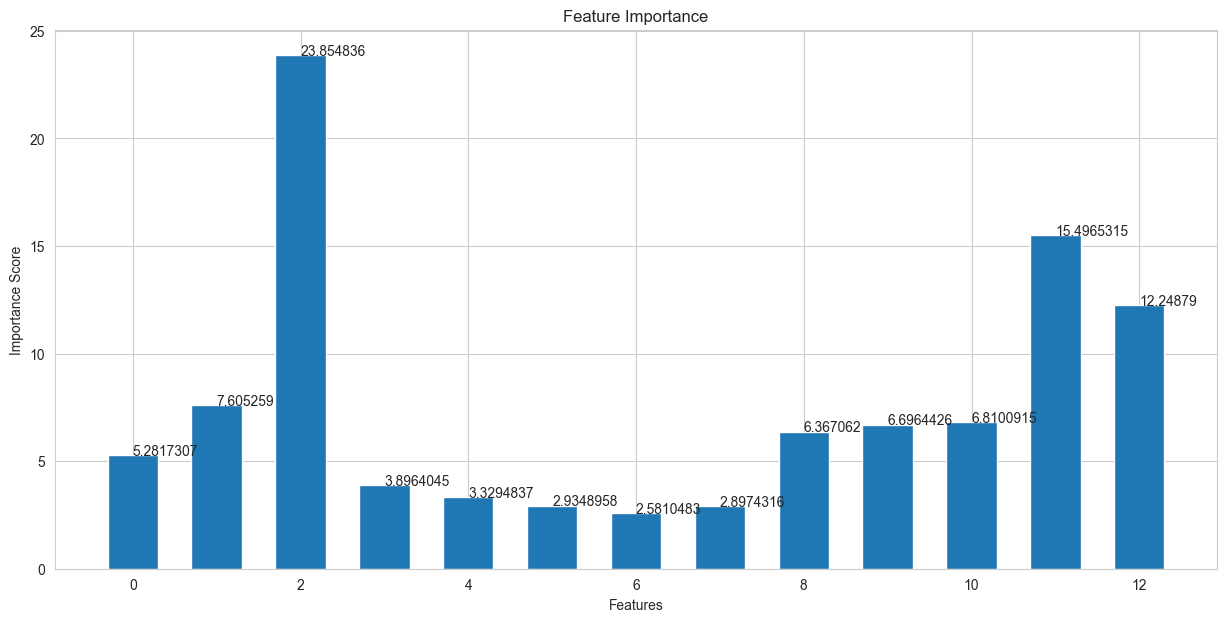

In [27]:
# Identifying feature importance for modelling

plt.figure(figsize = (15, 7))

plt.bar([i for i in range(len(X.columns))], feature_importances, width = 0.6)
for i in range(len(X.columns)):
    plt.text(i, feature_importances[i], feature_importances[i])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

c:\Users\dell\miniconda3\envs\tf_cpu\Lib\site-packages\h5py\__init__.py:36: UserWarning:

h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems



In [29]:
# Reduce learning rate when no improvement in target metric
reducelr_on_plt = ReduceLROnPlateau(monitor = 'val_loss',
                                    factor = 0.1,
                                    patience = 5,
                                    verbose = 0,
                                    mode = 'auto', 
                                    min_delta = 0.001,
                                    min_lr = 0.001)

# Early stopping to reduce overfitting
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', 
                                       verbose = 0, 
                                       patience = 20, 
                                       baseline = 0.3)

best_trained_model_file = 'best_trained_model.h5'

# Saving model after epoch
checkpoint = ModelCheckpoint(best_trained_model_file, 
                             verbose = 0,
                             monitor = 'val_loss', 
                             save_best_only = True, 
                             mode = 'auto')

callbacks = [checkpoint, reducelr_on_plt]
callbacks = [early_stopping_monitor]

In [30]:
# Defining model architecture

model = keras.Sequential([
    keras.Input(shape = (13)),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(1, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
])

In [31]:
# Compiling model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

# Parameters summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [32]:
# Mdel fitting
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    validation_split = 0.25, 
    epochs = 50,
    batch_size = 64,
    #callbacks = callbacks,
    verbose = 2
)

Epoch 1/50
12/12 - 8s - loss: 1.9148 - accuracy: 0.6719 - val_loss: 2.0003 - val_accuracy: 0.5175 - 8s/epoch - 636ms/step
Epoch 2/50
12/12 - 0s - loss: 1.7122 - accuracy: 0.8164 - val_loss: 1.9716 - val_accuracy: 0.5992 - 309ms/epoch - 26ms/step
Epoch 3/50
12/12 - 0s - loss: 1.6438 - accuracy: 0.8438 - val_loss: 1.9410 - val_accuracy: 0.6265 - 243ms/epoch - 20ms/step
Epoch 4/50
12/12 - 0s - loss: 1.5518 - accuracy: 0.8880 - val_loss: 1.8927 - val_accuracy: 0.7704 - 268ms/epoch - 22ms/step
Epoch 5/50
12/12 - 0s - loss: 1.5027 - accuracy: 0.9076 - val_loss: 1.8361 - val_accuracy: 0.8872 - 308ms/epoch - 26ms/step
Epoch 6/50
12/12 - 0s - loss: 1.4370 - accuracy: 0.9193 - val_loss: 1.7780 - val_accuracy: 0.7432 - 310ms/epoch - 26ms/step
Epoch 7/50
12/12 - 0s - loss: 1.3777 - accuracy: 0.9388 - val_loss: 1.6877 - val_accuracy: 0.8210 - 301ms/epoch - 25ms/step
Epoch 8/50
12/12 - 0s - loss: 1.3479 - accuracy: 0.9349 - val_loss: 1.6525 - val_accuracy: 0.7704 - 226ms/epoch - 19ms/step
Epoch 9/50

In [33]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

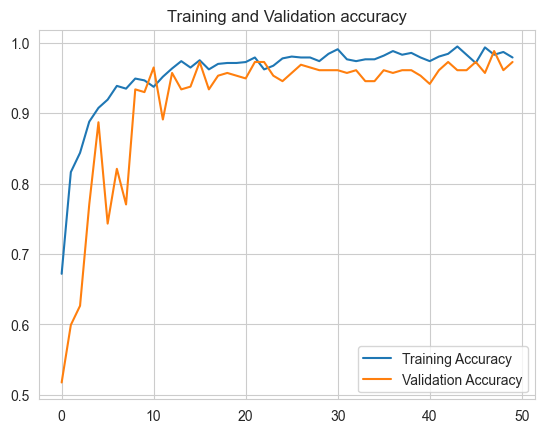

In [35]:
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy")
plt.show()

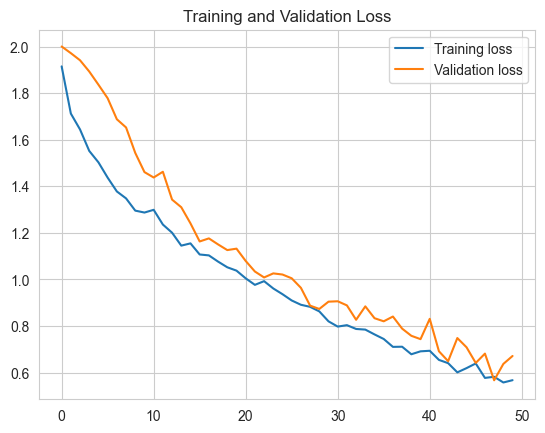

In [36]:
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")
plt.show()

In [37]:
# Evaluate model against seen and unseen data
train_score = model.evaluate(X_train, y_train, verbose = 0)
print("Evaluation score with training data: %.2f%%" % (train_score[1] * 100))

test_score = model.evaluate(X_test, y_test, verbose = 0)
print("Evaluation score with new data: %.2f%%" % (test_score[1] * 100))



Evaluation score with training data: 100.00%
Evaluation score with validating data: 97.28%


In [38]:
class_names = data.columns[13:]
class_names

Index(['target'], dtype='object')

In [39]:
# Visualising model actual and predicted class and probability
print("Model prediction testing")
y_pred_class = model.predict(X_test)
y_pred_class = np.argmax(y_pred_class, axis = -1)
y_pred_prob = model.predict(X_test)

print("Index | Actual | Predicted | Probability")
for idx, label in enumerate(y_test):
    print("   %s    |    %s    |    %s    |  %.2f%%" % (str(idx), str(label), str(y_pred_class[idx]), float(y_pred_prob[idx]) * 100))
    
print("Accuracy Score: %.2f%%" % (accuracy_score(y_test, y_pred_class) * 100))

Model prediction testing
9/9 [==============================] - 0s 4ms/step
Index | Actual | Predicted | Probability
   0    |    0    |    0    |  0.58%
   1    |    1    |    0    |  99.93%
   2    |    0    |    0    |  0.64%
   3    |    0    |    0    |  0.10%
   4    |    1    |    0    |  99.36%
   5    |    1    |    0    |  99.28%
   6    |    0    |    0    |  0.30%
   7    |    1    |    0    |  98.88%
   8    |    0    |    0    |  0.35%
   9    |    1    |    0    |  99.72%
   10    |    0    |    0    |  0.36%
   11    |    0    |    0    |  0.43%
   12    |    0    |    0    |  0.03%
   13    |    0    |    0    |  0.36%
   14    |    1    |    0    |  99.55%
   15    |    0    |    0    |  0.39%
   16    |    1    |    0    |  99.08%
   17    |    1    |    0    |  99.85%
   18    |    0    |    0    |  0.23%
   19    |    1    |    0    |  99.78%
   20    |    0    |    0    |  0.16%
   21    |    1    |    0    |  99.89%
   22    |    0    |    0    |  0.42%
   23    

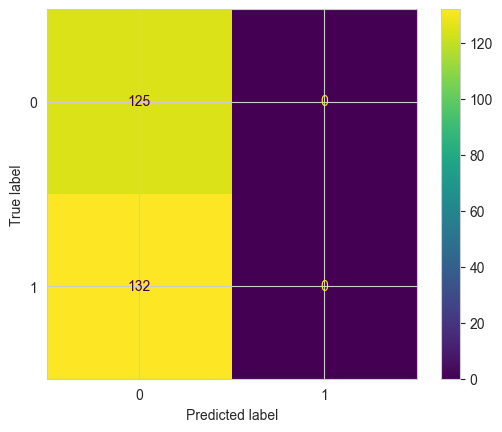

In [40]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

conf_mat.plot()
plt.show()

In [41]:
#print(" ")
#count = len(["ok" for idx, label in enumerate(y_test) if label == y_pred_class[idx]])
#print("Accuracy rate: %.2f%%" % ((float(count) / len(y_test)) * 100))